In [1]:
#importing the required modules
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import ExtraTreesClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
import lightgbm as lgb
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, roc_auc_score
from math import sqrt
import matplotlib.pyplot as plt

# Importing Data

In [2]:
data=pd.read_csv(r"D:\projects\sydney_rain prediction.csv")


In [3]:
data


,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,01-02-2008,Sydney,19.5,22.4,15.6,6.2,0.0,92.0,84.0,1017.6,1017.4,8.0,8.0,20.7,20.9,Yes,Yes
1,02-02-2008,Sydney,19.5,25.6,6.0,3.4,2.7,83.0,73.0,1017.9,1016.4,7.0,7.0,22.4,24.8,Yes,Yes
2,03-02-2008,Sydney,21.6,24.5,6.6,2.4,0.1,88.0,86.0,1016.7,1015.6,7.0,8.0,23.5,23.0,Yes,Yes
3,04-02-2008,Sydney,20.2,22.8,18.8,2.2,0.0,83.0,90.0,1014.2,1011.8,8.0,8.0,21.4,20.9,Yes,Yes
4,05-02-2008,Sydney,19.7,25.7,77.4,NaN,0.0,88.0,74.0,1008.3,1004.8,8.0,8.0,22.5,25.5,Yes,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3332,21-06-2017,Sydney,8.6,19.6,0.0,2.0,7.8,73.0,52.0,1025.9,1025.3,2.0,2.0,10.5,17.9,No,No
3333,22-06-2017,Sydney,9.3,19.2,0.0,2.0,9.2,78.0,53.0,1028.5,1024.6,2.0,2.0,11.0,18.7,No,No
3334,23-06-2017,Sydney,9.4,17.7,0.0,2.4,2.7,85.0,56.0,1020.8,1015.0,6.0,6.0,10.2,17.3,No,No
3335,24-06-2017,Sydney,10.1,19.3,0.0,1.4,9.3,56.0,35.0,1017.3,1015.1,5.0,2.0,12.4,19.0,No,No


# Data Preprocessing

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3337 entries, 0 to 3336
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          3337 non-null   object 
 1   Location      3337 non-null   object 
 2   MinTemp       3334 non-null   float64
 3   MaxTemp       3335 non-null   float64
 4   Rainfall      3331 non-null   float64
 5   Evaporation   3286 non-null   float64
 6   Sunshine      3321 non-null   float64
 7   Humidity9am   3323 non-null   float64
 8   Humidity3pm   3324 non-null   float64
 9   Pressure9am   3317 non-null   float64
 10  Pressure3pm   3318 non-null   float64
 11  Cloud9am      2771 non-null   float64
 12  Cloud3pm      2776 non-null   float64
 13  Temp9am       3333 non-null   float64
 14  Temp3pm       3333 non-null   float64
 15  RainToday     3331 non-null   object 
 16  RainTomorrow  3337 non-null   object 
dtypes: float64(13), object(4)
memory usage: 443.3+ KB


In [5]:
#finding duplicate values
data.duplicated().sum()

0

In [6]:
data.isnull().sum()

Date              0
Location          0
MinTemp           3
MaxTemp           2
Rainfall          6
Evaporation      51
Sunshine         16
Humidity9am      14
Humidity3pm      13
Pressure9am      20
Pressure3pm      19
Cloud9am        566
Cloud3pm        561
Temp9am           4
Temp3pm           4
RainToday         6
RainTomorrow      0
dtype: int64

In [7]:
#droping the unnecessary columns 
data=data.drop(['Date','Location'],axis=1)

In [8]:
#converting objects to integers using label encoders.
data['RainToday']=LabelEncoder().fit_transform(data['RainToday'])
data['RainTomorrow']=LabelEncoder().fit_transform(data['RainTomorrow'])


In [9]:
data


,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,19.5,22.4,15.6,6.2,0.0,92.0,84.0,1017.6,1017.4,8.0,8.0,20.7,20.9,1,1
1,19.5,25.6,6.0,3.4,2.7,83.0,73.0,1017.9,1016.4,7.0,7.0,22.4,24.8,1,1
2,21.6,24.5,6.6,2.4,0.1,88.0,86.0,1016.7,1015.6,7.0,8.0,23.5,23.0,1,1
3,20.2,22.8,18.8,2.2,0.0,83.0,90.0,1014.2,1011.8,8.0,8.0,21.4,20.9,1,1
4,19.7,25.7,77.4,NaN,0.0,88.0,74.0,1008.3,1004.8,8.0,8.0,22.5,25.5,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3332,8.6,19.6,0.0,2.0,7.8,73.0,52.0,1025.9,1025.3,2.0,2.0,10.5,17.9,0,0
3333,9.3,19.2,0.0,2.0,9.2,78.0,53.0,1028.5,1024.6,2.0,2.0,11.0,18.7,0,0
3334,9.4,17.7,0.0,2.4,2.7,85.0,56.0,1020.8,1015.0,6.0,6.0,10.2,17.3,0,0
3335,10.1,19.3,0.0,1.4,9.3,56.0,35.0,1017.3,1015.1,5.0,2.0,12.4,19.0,0,0


In [10]:
#filling missings values.
data['MinTemp'].fillna(data['MinTemp'].mean(),inplace=True)
data['MaxTemp'].fillna(data['MaxTemp'].mean(),inplace=True)
data['Rainfall'].fillna(data['Rainfall'].mean(),inplace=True)
data['Evaporation'].fillna(data['Evaporation'].mean(),inplace=True)
data['Sunshine'].fillna(data['Sunshine'].mean(),inplace=True)
data['Humidity9am'].fillna(data['Humidity9am'].mean(),inplace=True)
data['Humidity3pm'].fillna(data['Humidity3pm'].mean(),inplace=True)
data['Pressure9am'].fillna(data['Pressure9am'].mean(),inplace=True)
data['Pressure3pm'].fillna(data['Pressure3pm'].mean(),inplace=True)
data['Cloud9am'].fillna(data['Cloud9am'].mean(),inplace=True)
data['Cloud3pm'].fillna(data['Cloud3pm'].mean(),inplace=True)
data['Temp9am'].fillna(data['Temp9am'].mean(),inplace=True)
data['Temp3pm'].fillna(data['Temp3pm'].mean(),inplace=True)

In [12]:
data.isnull().sum()

MinTemp         0
MaxTemp         0
Rainfall        0
Evaporation     0
Sunshine        0
Humidity9am     0
Humidity3pm     0
Pressure9am     0
Pressure3pm     0
Cloud9am        0
Cloud3pm        0
Temp9am         0
Temp3pm         0
RainToday       0
RainTomorrow    0
dtype: int64

In [13]:
data

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,19.5,22.4,15.6,6.200000,0.0,92.0,84.0,1017.6,1017.4,8.0,8.0,20.7,20.9,1,1
1,19.5,25.6,6.0,3.400000,2.7,83.0,73.0,1017.9,1016.4,7.0,7.0,22.4,24.8,1,1
2,21.6,24.5,6.6,2.400000,0.1,88.0,86.0,1016.7,1015.6,7.0,8.0,23.5,23.0,1,1
3,20.2,22.8,18.8,2.200000,0.0,83.0,90.0,1014.2,1011.8,8.0,8.0,21.4,20.9,1,1
4,19.7,25.7,77.4,5.187432,0.0,88.0,74.0,1008.3,1004.8,8.0,8.0,22.5,25.5,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3332,8.6,19.6,0.0,2.000000,7.8,73.0,52.0,1025.9,1025.3,2.0,2.0,10.5,17.9,0,0
3333,9.3,19.2,0.0,2.000000,9.2,78.0,53.0,1028.5,1024.6,2.0,2.0,11.0,18.7,0,0
3334,9.4,17.7,0.0,2.400000,2.7,85.0,56.0,1020.8,1015.0,6.0,6.0,10.2,17.3,0,0
3335,10.1,19.3,0.0,1.400000,9.3,56.0,35.0,1017.3,1015.1,5.0,2.0,12.4,19.0,0,0


In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3337 entries, 0 to 3336
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MinTemp       3337 non-null   float64
 1   MaxTemp       3337 non-null   float64
 2   Rainfall      3337 non-null   float64
 3   Evaporation   3337 non-null   float64
 4   Sunshine      3337 non-null   float64
 5   Humidity9am   3337 non-null   float64
 6   Humidity3pm   3337 non-null   float64
 7   Pressure9am   3337 non-null   float64
 8   Pressure3pm   3337 non-null   float64
 9   Cloud9am      3337 non-null   float64
 10  Cloud3pm      3337 non-null   float64
 11  Temp9am       3337 non-null   float64
 12  Temp3pm       3337 non-null   float64
 13  RainToday     3337 non-null   int32  
 14  RainTomorrow  3337 non-null   int32  
dtypes: float64(13), int32(2)
memory usage: 365.1 KB


In [15]:
# Identify the variables for scaling (MinMaxScalar)

cols = ['RainToday','Temp3pm','Temp9am','Cloud3pm','Cloud9am','Pressure3pm','Pressure9am','Humidity3pm','Humidity9am','Sunshine','Evaporation','Rainfall','MaxTemp','MinTemp']

In [16]:
# Identify the independent and Target (dependent) variables

IndepVar = []
for col in data.columns:
    if col != 'RainTomorrow':
        IndepVar.append(col)

TargetVar = 'RainTomorrow'

x = data[IndepVar]
y = data[TargetVar]

In [17]:
# Scaling the features by using MinMaxScaler

from sklearn.preprocessing import MinMaxScaler

mmscaler = MinMaxScaler(feature_range=(0, 1))

x[cols] = mmscaler.fit_transform(x[cols])
x = pd.DataFrame(x)

<ipython-input-17-091c7939169b>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x[cols] = mmscaler.fit_transform(x[cols])
C:\Users\KEEP SMILE\anaconda3\lib\site-packages\pandas\core\indexing.py:1736: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())


In [18]:
x.corr()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday
MinTemp,1.000000,0.770701,0.012866,0.567623,-0.062959,0.052362,0.270944,-0.393024,-0.355764,0.236288,0.163519,0.938814,0.752410,0.019863
MaxTemp,0.770701,1.000000,-0.139837,0.509060,0.325107,-0.186875,-0.152310,-0.388533,-0.424653,-0.087381,-0.099167,0.858986,0.960026,-0.180474
Rainfall,0.012866,-0.139837,1.000000,-0.100468,-0.306119,0.330469,0.301337,-0.036988,0.003210,0.242049,0.200732,-0.055974,-0.143491,0.547499
Evaporation,0.567623,0.509060,-0.100468,1.000000,0.174467,-0.394166,-0.101849,-0.345700,-0.300285,-0.037598,-0.037739,0.605348,0.473879,-0.222425
Sunshine,-0.062959,0.325107,-0.306119,0.174467,1.000000,-0.489019,-0.582792,-0.046391,-0.094322,-0.660555,-0.676397,0.114663,0.343563,-0.355359
Humidity9am,0.052362,-0.186875,0.330469,-0.394166,-0.489019,1.000000,0.658120,0.263146,0.251304,0.423560,0.331734,-0.147977,-0.157149,0.387079
Humidity3pm,0.270944,-0.152310,0.301337,-0.101849,-0.582792,0.658120,1.000000,0.154352,0.183056,0.453697,0.471684,0.128479,-0.213727,0.333298
Pressure9am,-0.393024,-0.388533,-0.036988,-0.345700,-0.046391,0.263146,0.154352,1.000000,0.960460,-0.011072,-0.040115,-0.418943,-0.345926,-0.001957
Pressure3pm,-0.355764,-0.424653,0.003210,-0.300285,-0.094322,0.251304,0.183056,0.960460,1.000000,0.018972,-0.002903,-0.404472,-0.392218,0.054300
Cloud9am,0.236288,-0.087381,0.242049,-0.037598,-0.660555,0.423560,0.453697,-0.011072,0.018972,1.000000,0.608995,0.088428,-0.089334,0.310308


In [19]:
#principal components analysis not performing because we accuary is decreased when PCA is implemented code to implement the PCA is as follows.
principal=PCA(n_components=5)
principal.fit(x)
x=principal.transform(x)
x.shape

(3337, 5)

In [20]:
# Split the data into train and test (random sampling)

from sklearn.model_selection import train_test_split 

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

x_train_bk = x_train.copy()
x_test_bk = x_test.copy()

In [21]:
results=pd.read_csv(r"D:\projects\HTResults.csv",header=0)
results.head()

,Model Name,True_Positive,False_Negative,False_Positive,True_Negative,Accuracy,Precision,Recall,F1 Score,ROC_AUC_Score,MCC,Specificity,Balanced Accuracy


In [22]:
# Create objects of classification algorithm with default hyper-parameters
ModelLR = LogisticRegression()
ModelDC = DecisionTreeClassifier()
ModelRF = RandomForestClassifier()
ModelET = ExtraTreesClassifier()
ModelKNN = KNeighborsClassifier(n_neighbors=5)
ModelSVM = SVC(probability=True)
ModelXGB = XGBClassifier(n_estimators=1, max_depth=3, eval_metric='mlogloss')
modelBAG = BaggingClassifier(base_estimator=None, n_estimators=100, max_samples=1.0, max_features=1.0,bootstrap=True, bootstrap_features=False, oob_score=False, warm_start=False,n_jobs=None, random_state=None, verbose=0)
ModelGB = GradientBoostingClassifier(loss='deviance', learning_rate=0.1,n_estimators=100, subsample=1.0,criterion='friedman_mse', min_samples_split=2, min_samples_leaf=1,min_weight_fraction_leaf=0.0, max_depth=3, min_impurity_decrease=0.0, init=None,random_state=None,max_features=None, verbose=0, max_leaf_nodes=None, warm_start=False,validation_fraction=0.1, n_iter_no_change=None, tol=0.0001, ccp_alpha=0.0)
ModelLGB = lgb.LGBMClassifier()
ModelGNB = GaussianNB()


Model Name:  LogisticRegression()
Confusion matrix : 
 [[137 143]
 [ 46 676]]
Outcome values : 
 137 143 46 676
Classification report : 
               precision    recall  f1-score   support

           1       0.75      0.49      0.59       280
           0       0.83      0.94      0.88       722

    accuracy                           0.81      1002
   macro avg       0.79      0.71      0.73      1002
weighted avg       0.80      0.81      0.80      1002

Accuracy : 81.1 %
Precision : 74.9 %
Recall : 48.9 %
F1 Score : 0.592
Specificity or True Negative Rate : 93.6 %
Balanced Accuracy : 71.2 %
MCC : 0.494
roc_auc_score: 0.713


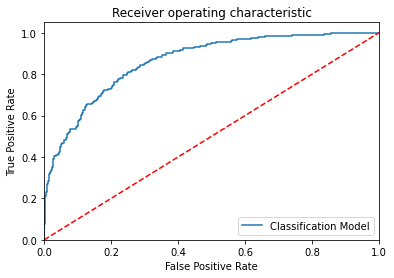

-----------------------------------------------------------------------------------------------------
Model Name:  DecisionTreeClassifier()
Confusion matrix : 
 [[155 125]
 [135 587]]
Outcome values : 
 155 125 135 587
Classification report : 
               precision    recall  f1-score   support

           1       0.53      0.55      0.54       280
           0       0.82      0.81      0.82       722

    accuracy                           0.74      1002
   macro avg       0.68      0.68      0.68      1002
weighted avg       0.74      0.74      0.74      1002

Accuracy : 74.1 %
Precision : 53.4 %
Recall : 55.4 %
F1 Score : 0.544
Specificity or True Negative Rate : 81.3 %
Balanced Accuracy : 68.4 %
MCC : 0.363
roc_auc_score: 0.683


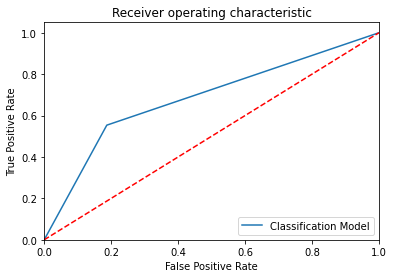

-----------------------------------------------------------------------------------------------------
Model Name:  RandomForestClassifier()
Confusion matrix : 
 [[149 131]
 [ 57 665]]
Outcome values : 
 149 131 57 665
Classification report : 
               precision    recall  f1-score   support

           1       0.72      0.53      0.61       280
           0       0.84      0.92      0.88       722

    accuracy                           0.81      1002
   macro avg       0.78      0.73      0.74      1002
weighted avg       0.80      0.81      0.80      1002

Accuracy : 81.2 %
Precision : 72.3 %
Recall : 53.2 %
F1 Score : 0.613
Specificity or True Negative Rate : 92.1 %
Balanced Accuracy : 72.6 %
MCC : 0.503
roc_auc_score: 0.727


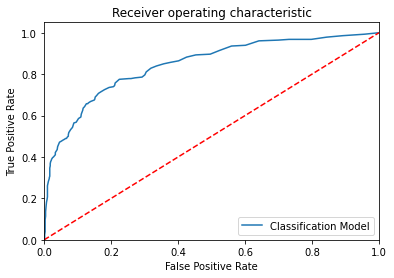

-----------------------------------------------------------------------------------------------------
Model Name:  ExtraTreesClassifier()
Confusion matrix : 
 [[154 126]
 [ 66 656]]
Outcome values : 
 154 126 66 656
Classification report : 
               precision    recall  f1-score   support

           1       0.70      0.55      0.62       280
           0       0.84      0.91      0.87       722

    accuracy                           0.81      1002
   macro avg       0.77      0.73      0.74      1002
weighted avg       0.80      0.81      0.80      1002

Accuracy : 80.8 %
Precision : 70.0 %
Recall : 55.0 %
F1 Score : 0.616
Specificity or True Negative Rate : 90.9 %
Balanced Accuracy : 73.0 %
MCC : 0.497
roc_auc_score: 0.729


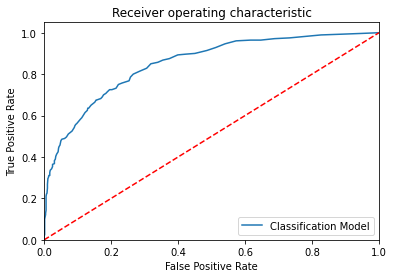

-----------------------------------------------------------------------------------------------------
Model Name:  KNeighborsClassifier()
Confusion matrix : 
 [[154 126]
 [ 77 645]]
Outcome values : 
 154 126 77 645
Classification report : 
               precision    recall  f1-score   support

           1       0.67      0.55      0.60       280
           0       0.84      0.89      0.86       722

    accuracy                           0.80      1002
   macro avg       0.75      0.72      0.73      1002
weighted avg       0.79      0.80      0.79      1002

Accuracy : 79.7 %
Precision : 66.7 %
Recall : 55.0 %
F1 Score : 0.603
Specificity or True Negative Rate : 89.3 %
Balanced Accuracy : 72.2 %
MCC : 0.472
roc_auc_score: 0.722


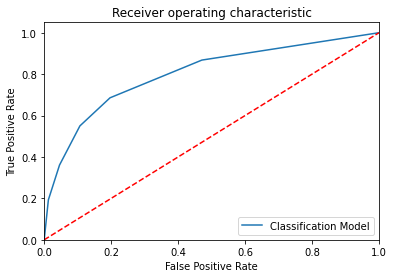

-----------------------------------------------------------------------------------------------------
Model Name:  SVC(probability=True)
Confusion matrix : 
 [[132 148]
 [ 41 681]]
Outcome values : 
 132 148 41 681
Classification report : 
               precision    recall  f1-score   support

           1       0.76      0.47      0.58       280
           0       0.82      0.94      0.88       722

    accuracy                           0.81      1002
   macro avg       0.79      0.71      0.73      1002
weighted avg       0.81      0.81      0.80      1002

Accuracy : 81.1 %
Precision : 76.3 %
Recall : 47.1 %
F1 Score : 0.583
Specificity or True Negative Rate : 94.3 %
Balanced Accuracy : 70.7 %
MCC : 0.492
roc_auc_score: 0.707


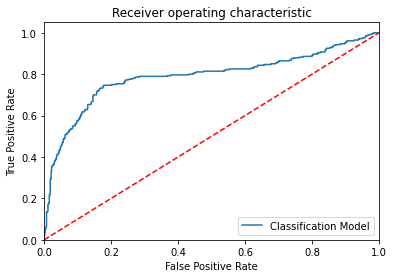

-----------------------------------------------------------------------------------------------------
Model Name:  XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric='mlogloss', gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_to_onehot=4, max_delta_step=0, max_depth=3,
              max_leaves=0, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=1, n_jobs=0,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)
Confusion matrix : 
 [[117 163]
 [ 39 683]]
Outcome values : 
 117 163 39 683
Classification report : 
               precision    recall  f1-score   support

         

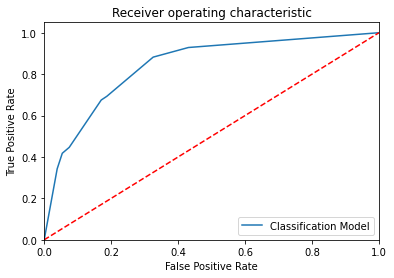

-----------------------------------------------------------------------------------------------------
Model Name:  BaggingClassifier(n_estimators=100)
Confusion matrix : 
 [[161 119]
 [ 58 664]]
Outcome values : 
 161 119 58 664
Classification report : 
               precision    recall  f1-score   support

           1       0.74      0.57      0.65       280
           0       0.85      0.92      0.88       722

    accuracy                           0.82      1002
   macro avg       0.79      0.75      0.76      1002
weighted avg       0.82      0.82      0.82      1002

Accuracy : 82.3 %
Precision : 73.5 %
Recall : 57.5 %
F1 Score : 0.645
Specificity or True Negative Rate : 92.0 %
Balanced Accuracy : 74.8 %
MCC : 0.537
roc_auc_score: 0.747


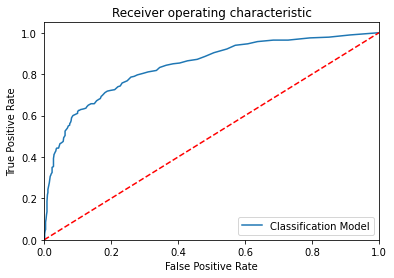

-----------------------------------------------------------------------------------------------------


C:\Users\KEEP SMILE\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:310: FutureWarning: The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.
  warnings.warn(


Model Name:  GradientBoostingClassifier(loss='deviance')
Confusion matrix : 
 [[150 130]
 [ 48 674]]
Outcome values : 
 150 130 48 674
Classification report : 
               precision    recall  f1-score   support

           1       0.76      0.54      0.63       280
           0       0.84      0.93      0.88       722

    accuracy                           0.82      1002
   macro avg       0.80      0.73      0.76      1002
weighted avg       0.82      0.82      0.81      1002

Accuracy : 82.2 %
Precision : 75.8 %
Recall : 53.6 %
F1 Score : 0.628
Specificity or True Negative Rate : 93.4 %
Balanced Accuracy : 73.5 %
MCC : 0.529
roc_auc_score: 0.735


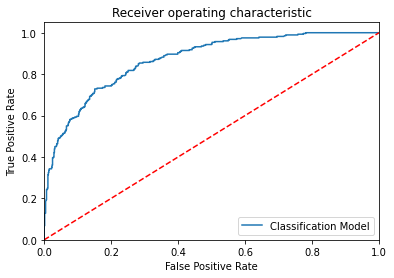

-----------------------------------------------------------------------------------------------------
Model Name:  LGBMClassifier()
Confusion matrix : 
 [[160 120]
 [ 74 648]]
Outcome values : 
 160 120 74 648
Classification report : 
               precision    recall  f1-score   support

           1       0.68      0.57      0.62       280
           0       0.84      0.90      0.87       722

    accuracy                           0.81      1002
   macro avg       0.76      0.73      0.75      1002
weighted avg       0.80      0.81      0.80      1002

Accuracy : 80.6 %
Precision : 68.4 %
Recall : 57.1 %
F1 Score : 0.623
Specificity or True Negative Rate : 89.8 %
Balanced Accuracy : 73.4 %
MCC : 0.497
roc_auc_score: 0.734


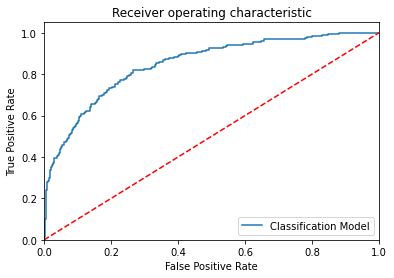

-----------------------------------------------------------------------------------------------------
Model Name:  GaussianNB()
Confusion matrix : 
 [[154 126]
 [ 64 658]]
Outcome values : 
 154 126 64 658
Classification report : 
               precision    recall  f1-score   support

           1       0.71      0.55      0.62       280
           0       0.84      0.91      0.87       722

    accuracy                           0.81      1002
   macro avg       0.77      0.73      0.75      1002
weighted avg       0.80      0.81      0.80      1002

Accuracy : 81.0 %
Precision : 70.6 %
Recall : 55.0 %
F1 Score : 0.618
Specificity or True Negative Rate : 91.1 %
Balanced Accuracy : 73.0 %
MCC : 0.502
roc_auc_score: 0.731


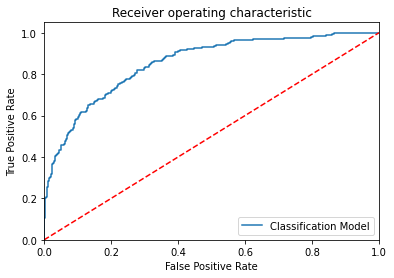

-----------------------------------------------------------------------------------------------------


In [23]:
MM2= [ModelLR, ModelDC, ModelRF, ModelET,ModelKNN, ModelSVM,ModelXGB, modelBAG,ModelGB, ModelLGB, ModelGNB]
for models in MM2:
            
    # Train the model training dataset
    
    models.fit(x_train, y_train)
    
    # Prediction the model with test dataset
    
    y_pred = models.predict(x_test)
    y_pred_prob = models.predict_proba(x_test)
    
    # Print the model name
    
    print('Model Name: ', models)
    
    # actual values

    actual = y_test

    # predicted values

    predicted = y_pred

    # confusion matrix

    matrix = confusion_matrix(actual,predicted, labels=[1,0],sample_weight=None, normalize=None)
    print('Confusion matrix : \n', matrix)

    # outcome values order in sklearn

    tp, fn, fp, tn = confusion_matrix(actual,predicted,labels=[1,0]).reshape(-1)
    print('Outcome values : \n', tp, fn, fp, tn)

    # classification report for precision, recall f1-score and accuracy

    C_Report = classification_report(actual,predicted,labels=[1,0])

    print('Classification report : \n', C_Report)

    # calculating the metrics

    sensitivity = round(tp/(tp+fn), 3);
    specificity = round(tn/(tn+fp), 3);
    accuracy = round((tp+tn)/(tp+fp+tn+fn), 3);
    balanced_accuracy = round((sensitivity+specificity)/2, 3);
    
    precision = round(tp/(tp+fp), 3);
    f1Score = round((2*tp/(2*tp + fp + fn)), 3);

    # Matthews Correlation Coefficient (MCC). Range of values of MCC lie between -1 to +1. 
    # A model with a score of +1 is a perfect model and -1 is a poor model

    

    mx = (tp+fp) * (tp+fn) * (tn+fp) * (tn+fn)
    MCC = round(((tp * tn) - (fp * fn)) / sqrt(mx), 3)

    print('Accuracy :', round(accuracy*100, 2),'%')
    print('Precision :', round(precision*100, 2),'%')
    print('Recall :', round(sensitivity*100,2), '%')
    print('F1 Score :', f1Score)
    print('Specificity or True Negative Rate :', round(specificity*100,2), '%'  )
    print('Balanced Accuracy :', round(balanced_accuracy*100, 2),'%')
    print('MCC :', MCC)

    # Area under ROC curve 

    

    print('roc_auc_score:', round(roc_auc_score(actual, y_pred), 3))
    
    # ROC Curve
    
   
    Model_roc_auc = roc_auc_score(actual, y_pred)
    fpr, tpr, thresholds = roc_curve(actual, models.predict_proba(x_test)[:,1])
    plt.figure()
    #
    plt.plot(fpr, tpr, label= 'Classification Model' % Model_roc_auc)
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.savefig('Log_ROC')
    plt.show()
    print('-----------------------------------------------------------------------------------------------------')
    #----------------------------------------------------------------------------------------------------------
    new_row = {'Model Name' : models,
               'True_Positive': tp,
               'False_Negative': fn, 
               'False_Positive': fp, 
               'True_Negative': tn,
               'Accuracy' : accuracy,
               'Precision' : precision,
               'Recall' : sensitivity,
               'F1 Score' : f1Score,
               'ROC_AUC_Score':roc_auc_score(actual, y_pred),
               'Specificity' : specificity,
               'MCC': MCC,
               'Balanced Accuracy':balanced_accuracy}
    results= results.append(new_row, ignore_index=True)
    #----------------------------------------------------------------------------------------------------------

In [24]:
results

,Model Name,True_Positive,False_Negative,False_Positive,True_Negative,Accuracy,Precision,Recall,F1 Score,ROC_AUC_Score,MCC,Specificity,Balanced Accuracy
0,LogisticRegression(),137,143,46,676,0.811,0.749,0.489,0.592,0.712787,0.494,0.936,0.712
1,DecisionTreeClassifier(),155,125,135,587,0.741,0.534,0.554,0.544,0.683295,0.363,0.813,0.684
2,"(DecisionTreeClassifier(max_features='sqrt', r...",149,131,57,665,0.812,0.723,0.532,0.613,0.726598,0.503,0.921,0.726
3,"(ExtraTreeClassifier(random_state=1559096602),...",154,126,66,656,0.808,0.700,0.550,0.616,0.729294,0.497,0.909,0.730
4,KNeighborsClassifier(),154,126,77,645,0.797,0.667,0.550,0.603,0.721676,0.472,0.893,0.722
5,SVC(probability=True),132,148,41,681,0.811,0.763,0.471,0.583,0.707321,0.492,0.943,0.707
6,"XGBClassifier(base_score=0.5, booster='gbtree'...",117,163,39,683,0.798,0.750,0.418,0.537,0.681920,0.450,0.946,0.682
7,(DecisionTreeClassifier(random_state=561658122...,161,119,58,664,0.823,0.735,0.575,0.645,0.747334,0.537,0.920,0.748
8,([DecisionTreeRegressor(criterion='friedman_ms...,150,130,48,674,0.822,0.758,0.536,0.628,0.734616,0.529,0.934,0.735
9,LGBMClassifier(),160,120,74,648,0.806,0.684,0.571,0.623,0.734468,0.497,0.898,0.734


# Hyper parameter tunning

In [32]:
from sklearn.model_selection import GridSearchCV
GS_grid = {
    'bootstrap': [True, False],
    'max_depth': [10,15],
    'max_features': ['auto', 'sqrt', 'log2'],
    #'min_samples_leaf': [3, 4, 5, 6],
    #'min_samples_split': [3,4,5,6],
    'n_estimators': [100, 200, 300, 400, 500]
}

# Create object for model

ModelRF2 =RandomForestClassifier()

# Instantiate the grid search model

Grid_search = GridSearchCV(estimator = ModelRF2, param_grid = GS_grid, cv = 3, n_jobs = -1, verbose = 2)

# Fit the grid search to the data

Grid_search.fit(x_train,y_train)

Fitting 3 folds for each of 60 candidates, totalling 180 fits


C:\Users\KEEP SMILE\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'bootstrap': [True, False], 'max_depth': [10, 15],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [100, 200, 300, 400, 500]},
             verbose=2)

In [33]:
Grid_search.best_params_

{'bootstrap': True,
 'max_depth': 15,
 'max_features': 'auto',
 'n_estimators': 100}

Model Name:  GaussianNB()
Confusion matrix : 
 [[154 126]
 [ 64 658]]
Outcome values : 
 154 126 64 658
Classification report : 
               precision    recall  f1-score   support

           1       0.71      0.55      0.62       280
           0       0.84      0.91      0.87       722

    accuracy                           0.81      1002
   macro avg       0.77      0.73      0.75      1002
weighted avg       0.80      0.81      0.80      1002

Accuracy : 81.0 %
Precision : 70.6 %
Recall : 55.0 %
F1 Score : 0.618
Specificity or True Negative Rate : 91.1 %
Balanced Accuracy : 73.0 %
MCC : 0.502
roc_auc_score: 0.731


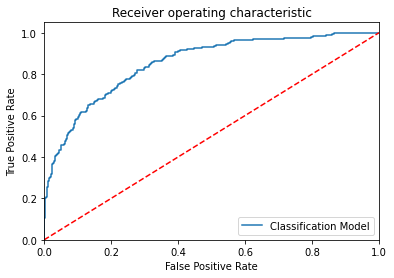

-----------------------------------------------------------------------------------------------------


In [34]:
rand_regressor = RandomForestClassifier(n_estimators=100,max_features='auto',max_depth=15)
# Train the model training dataset
    
models.fit(x_train, y_train)
    
# Prediction the model with test dataset
    
y_pred = models.predict(x_test)
y_pred_prob = models.predict_proba(x_test)
    
# Print the model name
    
print('Model Name: ', models)
    
# actual values

actual = y_test

# predicted values

predicted = y_pred

# confusion matrix

matrix = confusion_matrix(actual,predicted, labels=[1,0],sample_weight=None, normalize=None)
print('Confusion matrix : \n', matrix)

# outcome values order in sklearn

tp, fn, fp, tn = confusion_matrix(actual,predicted,labels=[1,0]).reshape(-1)
print('Outcome values : \n', tp, fn, fp, tn)

# classification report for precision, recall f1-score and accuracy

C_Report = classification_report(actual,predicted,labels=[1,0])

print('Classification report : \n', C_Report)

# calculating the metrics

sensitivity = round(tp/(tp+fn), 3);
specificity = round(tn/(tn+fp), 3);
accuracy = round((tp+tn)/(tp+fp+tn+fn), 3);
balanced_accuracy = round((sensitivity+specificity)/2, 3);
    
precision = round(tp/(tp+fp), 3);
f1Score = round((2*tp/(2*tp + fp + fn)), 3);

# Matthews Correlation Coefficient (MCC). Range of values of MCC lie between -1 to +1. 
# A model with a score of +1 is a perfect model and -1 is a poor model
mx = (tp+fp) * (tp+fn) * (tn+fp) * (tn+fn)
MCC = round(((tp * tn) - (fp * fn)) / sqrt(mx), 3)

print('Accuracy :', round(accuracy*100, 2),'%')
print('Precision :', round(precision*100, 2),'%')
print('Recall :', round(sensitivity*100,2), '%')
print('F1 Score :', f1Score)
print('Specificity or True Negative Rate :', round(specificity*100,2), '%'  )
print('Balanced Accuracy :', round(balanced_accuracy*100, 2),'%')
print('MCC :', MCC)
# Area under ROC curve 
print('roc_auc_score:', round(roc_auc_score(actual, y_pred), 3))
# ROC Curve
Model_roc_auc = roc_auc_score(actual, y_pred)
fpr, tpr, thresholds = roc_curve(actual, models.predict_proba(x_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label= 'Classification Model' % Model_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()
print('-----------------------------------------------------------------------------------------------------')

# Question-1

Your views about the problem statement?

Ans: The problem statement involves creating a machine learning model to help 'The Daily Buzz' news paper to predict the rain fall. To implement this we should use classifier machine learning models.

# Question-2

What will be your approach to solving this task?

Ans: First we need to import data, next we need to clean the data by removing duplicate values,filling missing values,performing PCA etc. next we need to split the data to train and test datasets As it is a classification problem we need to apply classification models on the datasets fetch the best model from the performed models.

# Question-3

What were the available ML model options you had to perform this task?

As this is a regression problem we can perform regression models on the dataset to predict the CTC values:

1.LogisticRegression

2.DecisionTreeClassifier

3.RandomForestClassifier

4.ExtraTreesClassifier

5.KNeighborsClassifier

6.SVC

7.XGBClassifier

8.BaggingClassifier

9.GradientBoostingClassifier

10.lgb.LGBMClassifier

11.GaussianNB

# Question-4

Which model’s performance is best and what could be the possible reason for that?

Ans:According to my results RandomForestRegression performs best next
GradientBoostingClassifier,BaggingClassifier and ExtraTreesClassifier.This is because RandomForest takes the output from number of decisions and gives output as maximum count of those outputs,as different number of sets of data samples are given to different decision trees they give their result parallely.

# Question-5

What steps can you take to improve this selected model’s performance even further?

Ans: the folloeing methods can be used to improve the model quality: Hyperparameter Tuning: Optimize the hyperparameters of the selected model. Hyperparameters control the behavior and performance of the model. Utilize techniques like grid search or random search to find the best combination of hyperparameters that yield optimal performance.

Cross-Validation: Employ cross-validation techniques, such as k-fold cross-validation, to assess the model's performance more accurately. Cross-validation helps evaluate the model's generalization ability and can provide insights into potential areas of improvement.